In [1]:
# get the environment
import sys
print(sys.version)
print(sys.executable)

3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
C:\Users\bbutler\Documents\Anaconda3\envs\timeseries\python.exe


In [2]:
from pytrends.request import TrendReq
import pandas as pd
import time
import os

# set options
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 100)

startTime = time.time()
pytrend = TrendReq(hl='en-US', tz=300)

In [5]:
# set the directory
os.chdir('C:\\Users\\bbutler\\Documents\\DigitalAnalytics\\2020KeyWordTrends')

In [32]:
os.listdir()

['CheckingKeywords.csv',
 'checking_trends.csv',
 'HelocKeywords.csv',
 'heloc_trends.csv',
 'PLoanKeywords.csv']

In [33]:
colnames = ["Keywords"]
df = pd.read_csv("PLoanKeywords.csv", names=colnames)
df.head()

,Keywords
0,Keywords
1,Personal loans
2,Bank loan
3,Personal loan online


In [34]:
df2 = df["Keywords"].values.tolist()
df2

['Keywords', 'Personal loans', 'Bank loan', 'Personal loan online']

In [35]:
df2.remove("Keywords")

In [36]:
dataset = []
for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2018-01-01 2020-11-01',
     geo='US-MA')
     data = pytrend.interest_over_time()
     
     if not data.empty:
         data = data.drop(labels=['isPartial'],axis='columns')
         dataset.append(data)

result = pd.concat(dataset, axis=1)
result.head(10)

,Personal loans,Bank loan,Personal loan online
date,,,
2018-01-07,58,47,0
2018-01-14,61,57,0
2018-01-21,45,52,33
2018-01-28,37,48,0
2018-02-04,85,50,65
2018-02-11,33,58,33
2018-02-18,36,40,0
2018-02-25,47,37,32
2018-03-04,23,57,0


In [37]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2018-01-07 to 2020-11-01
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Personal loans        148 non-null    int32
 1   Bank loan             148 non-null    int32
 2   Personal loan online  148 non-null    int32
dtypes: int32(3)
memory usage: 2.9 KB


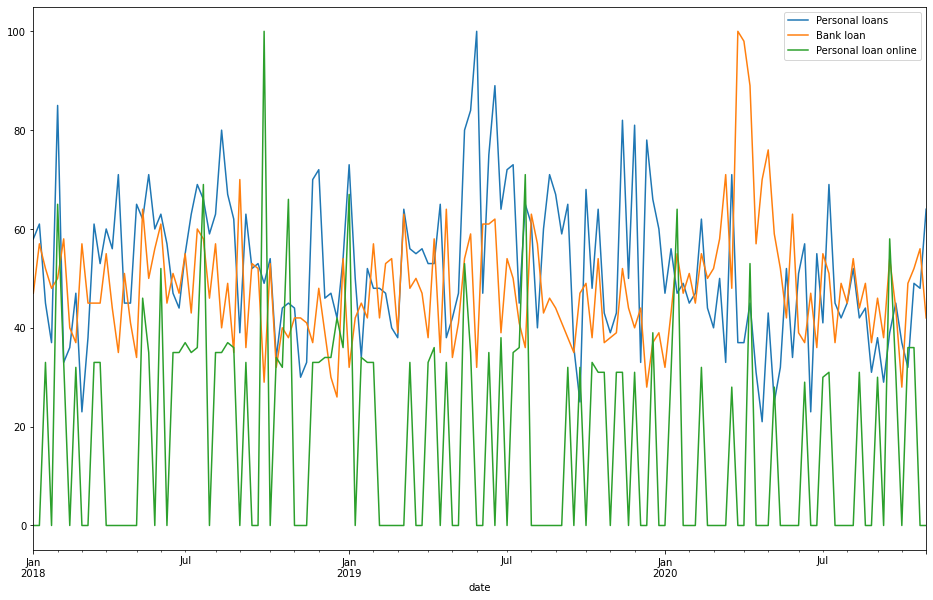

In [38]:
result.plot(figsize=(16,10))

In [39]:
result.reset_index(inplace= True)
result.head()


,date,Personal loans,Bank loan,Personal loan online
0,2018-01-07,58,47,0
1,2018-01-14,61,57,0
2,2018-01-21,45,52,33
3,2018-01-28,37,48,0
4,2018-02-04,85,50,65


In [40]:
result.to_csv('ploan_trends.csv', index=False)